#### Markovian stochastic dynamics

|State|Discrete|Continuous
|---|---|---|
|Trajectory view|Recursion equation(e.g. Ranodm walk)|Stochastic differential (e.g. Ornstein-Uhlenbeck process)
|Distribution view|Master equation(e.g. random walk, birth-death, chemical master equation)| Fokker-Planck equation(e.g. diffusion equation)|

Taken Brownian motion as an example:

Trajectory view: $x(t+\Delta t) = x(t) + \sqrt{2D\Delta t}\xi(t)$

Distribution view: $\frac{\partial P}{\partial t} =D \frac{\partial^2 P}{\partial x^2} $

Solving both, we can arrive at the final distribution:

$$P(x,t)=\frac{1}{\sqrt{4\pi Dt}}e^{-\frac{x^2}{4\pi Dt}}$$


### Chemical master equation

Chemical master equation is a stochastic model for chemical reactions. It is stochastic with fluctuations, many chemical species beyond a single "walker".

One specis., one reactin: $x\to^k \emptyset$, which means that the species $x$ decays to nothing with rate $k$.

Continuous: Reaction Rate Equation

$$
\frac{dx}{dt} = -kx + \text{noise}
$$

which is the rate of change of the number of molecules.

Discrete: Chemical Master Equation

$$
\partial_t P_t(n) = -k(n+1)P_t(n+1) - knP_t(n)
$$

where $P_t(n)$ is the probability distribution, $t$ is the time, $n$ is the number of molecules, and $k$ is the reaction rate. This function is intuitively the probability of having $n$ molecules at time $t$.

The discre description is more accurate, but it is hard to solve for large $n$.

#### A solvable example: birth-death process

Define

$$
X\in [0,N], \emptyset \to^{k_2} X, X \to^{k_1} \emptyset
$$

We have the equation

$$
\frac{dP_t(n)}{dt} = B(n+1)P_t(n+1) + F(n-1)P_t(n-1) - (B(n) + F(n))P_t(n)\\
F(n) = k_2\\
B(n) = k_1 n
$$

where $P_t(n)$ is the probability distribution, $t$ is the time, $n$ is the number of molecules, $B(n)$ is the birth rate, $F(n)$ is the death rate, $k_1$ is the birth rate constant, and $k_2$ is the death rate constant.

> How to solve it?

Steady state: $\frac{dP_t(n)}{dt} = 0$, or

$$
B(n+1)P_t(n+1) + F(n-1)P_t(n-1) = (B(n) + F(n))P_t(n)
$$

We can use a generating function to solve it:

- Define $G(z) = \sum_{n=0}^N z^n P_t(n)$
- Then we have $G'(z) = \sum_{n=0}^N n z^{n-1} P_t(n)$
- And $G''(z) = \sum_{n=0}^N n(n-1) z^{n-2} P_t(n)$
- So we have $G''(z) = B(z) G(z) + F(z) G(z)$
- Then we have $G''(z) = (B(z) + F(z)) G(z)$
- Then we have $G''(z) = (k_1 z + k_2) G(z)$
- Then we have $G''(z) - k_1 z G(z) - k_2 G(z) = 0$
- Then we have $G(z) = A e^{r_1 z} + B e^{r_2 z}$

Solve the equation ,we have

$$
A=\frac{1}{r_2 - r_1} \frac{r_2}{r_2 - k_1} \\
B=\frac{1}{r_2 - r_1} \frac{-r_1}{r_2 - k_1}\\
r_1 = \frac{k_1 - \sqrt{k_1^2 + 4k_2}}{2}\\
r_2 = \frac{k_1 + \sqrt{k_1^2 + 4k_2}}{2}
$$


> This is only for stationary state, how about the time evolution?
>
> Omitted.



#### Gillespie algorithm

Gillespie algorithm is a stochastic simulation algorithm for chemical master equation. It is a Monte Carlo method that simulates the time evolution of a chemical system.

A pseudo-code of the algorithm:

```
# Define the system with the initial number of molecules and the reaction rate constants
# Initialize the time to zero
# Loop until the end time or condition is reached
  # Calculate the total propensity function by summing all the reaction propensities
  # Generate two random numbers from a uniform distribution between 0 and 1
  # Use one random number to determine the time interval until the next reaction event
  # Use another random number to determine which reaction will occur next
  # Update the system by increasing the time by the time interval and changing the number of molecules according to the chosen reaction
# End loop
# Plot or output the results
```

This algorithm is based on the following theory:

- The time interval until the next reaction event is an exponential random variable with the rate parameter equal to the total propensity function: $t \sim \text{Exp}(\alpha_0)$
- The probability of each reaction event is proportional to its propensity function: $\text{Pr}(R_i) = \frac{\alpha_i}{\alpha_0}$
- The number of molecules after each reaction event is a multinomial random variable with the number of trials equal to the number of molecules before the reaction event and the probability of each outcome equal to the probability of each reaction event: $X \sim \text{Multinomial}(n, \text{Pr}(R_i))$
- The number of molecules after each reaction event is a Poisson random variable with the rate parameter equal to the propensity function: $X \sim \text{Poisson}(\alpha_i)$



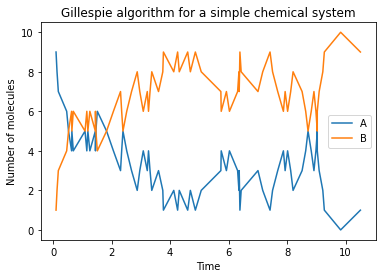

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the system with two reactions: A -> B and B -> A
# The initial number of molecules for A and B are 10 and 0, respectively
# The reaction rate constants for A -> B and B -> A are 1.0 and 0.5, respectively
x_A = 10 # number of A molecules
x_B = 0 # number of B molecules
k_1 = 1.0 # rate constant for A -> B
k_2 = 0.5 # rate constant for B -> A

# Initialize the time to zero
t = 0

# Create empty lists to store the time and molecule values
t_list = []
x_A_list = []
x_B_list = []

# Loop until the end time of 10 is reached
while t < 10:
    # Calculate the total propensity function
    a_total = k_1 * x_A + k_2 * x_B
    
    # Generate two random numbers from a uniform distribution between 0 and 1
    r_1 = np.random.uniform(0,1)
    r_2 = np.random.uniform(0,1)
    
    # Use one random number to determine the time interval until the next reaction event
    tau = (1 / a_total) * np.log(1 / r_1)
    
    # Use another random number to determine which reaction will occur next
    if r_2 < (k_1 * x_A) / a_total:
        # A -> B occurs
        x_A -= 1 # decrease A by 1
        x_B += 1 # increase B by 1
    else:
        # B -> A occurs
        x_A += 1 # increase A by 1
        x_B -= 1 # decrease B by 1
    
    # Update the time by adding the time interval
    t += tau
    
    # Append the time and molecule values to the lists
    t_list.append(t)
    x_A_list.append(x_A)
    x_B_list.append(x_B)

# Plot or output the results
plt.plot(t_list, x_A_list, label="A")
plt.plot(t_list, x_B_list, label="B")
plt.xlabel("Time")
plt.ylabel("Number of molecules")
plt.title("Gillespie algorithm for a simple chemical system")
plt.legend()
plt.show()

Gaurateen of this algorihtm:

- Theorem: Two random variable can simulate a random walk process. (?)



### Stochastic reaction networks with $M$ species (each with count $N$)

$$
\sum_{j=1}^M r_{ki}X_i \xrightarrow{c_k} \sum_{j=1}^M p_{ki}X_i
$$

We have equation

$$
\partial_t P_t(\bold{n}) = \sum_{k=1}^K [a_k(\bold{n} - s_k)P_t(\bold{n} - s_k) - a_k(\bold{n})P_t(\bold{n})]
$$

Then we can derive the final state of the system with the matrix $r,p,c$. (The matrix $r$ is the stoichiometry matrix, $p$ is the propensity matrix, and $c$ is the reaction rate matrix.)

$$
c = p - r
$$

The chemical transformation matrx $\mathbb{T}$ is defined as

A numeric example:

$$
\emptyset \xrightarrow{1} A\\
A \xrightarrow{1} \emptyset
$$

We have

$$
r = \begin{bmatrix}
-1\\
1
\end{bmatrix}\\
p = \begin{bmatrix}
1\\
1
\end{bmatrix}\\
c = \begin{bmatrix}
2\\
0
\end{bmatrix}
$$

The joint probability $P_t(\bold{n})$ can be difficult to handle, since $\bold{n}$ is a vector of length $N^M$.

This quickly become prohibitive for large $M$. (e.g. 10 species with 16 counts each, $N^M = 10^{16}$, here counts means the number of molecules of each species)

We can propose a parameterization of the joint probability $P_t^{\theta_{t}}(\bold{n})$, and then minimize the loss defined as

$$
\mathcal{L}=D_\text{KL}(P_{t^+\delta t}^{\theta_{t+\delta t}}(\bold{n})||\mathbb{T}P_t^{\theta_t}(\bold{n}))
$$

where $D_\text{KL}$ is the Kullback-Leibler divergence, $P_{t^+\delta t}^{\theta_{t+\delta t}}(\bold{n})$ is the joint probability at time $t+\delta t$ with parameter $\theta_{t+\delta t}$, $P_t^{\theta_t}(\bold{n})$ is the joint probability at time $t$ with parameter $\theta_t$, and $\mathbb{T}$ is the chemical transformation matrix.

The dimension of the matrix $\mathbb{T}$ is $N^M\times N^M$, where $N$ is the number of molecules, and $M$ is the number of species.

The loss function is the Kullback-Leibler divergence between the joint probability at time $t+\delta t$ and the joint probability at time $t$ transformed by the chemical transformation matrix. 

> Why not implement the time $t$ as an embedding?
> 
> Tried , not promising due to the long step negative probability problem.

> Is this size big enough? Given $N$ and $M$, the distribuiton is of dimension $N^M$, where $\bold{n}$ indicates the number state of he system
> 
> e.g. $\ket{1,0,0}$ means there is one molecule of species 1, and no molecule of species 2 and 3.



## New directions

This training use a neural network to replace the transition matrix via sampling from the matrix. Such method shows promising result in simulating chemical reaction.

It is essentially based on a variational method with auto-differentiation. Another promising direction is using "stochastic auto-differentiation", which is developed in SciML. See talk [Agent-based modelling for prediction of chaotic systems](https://iclr.cc/virtual/2023/14704) for more information.